In [251]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Lasso ,Ridge
from sklearn.model_selection import  cross_val_score

# Data Load

In [244]:
origin_train = pd.read_csv("train.csv")
origin_test = pd.read_csv('test.csv')
print(list(origin_train.columns))

['date_time', 'deg_C', 'relative_humidity', 'absolute_humidity', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']


# model test

In [237]:
def model_fit_kfold (model_choise,train_x , train_y, cv = 10):
    model = model_choise 
    model.fit(train_x , train_y)
    scores = cross_val_score(model, train_x, train_y, cv = cv).mean()
    return model , scores

# none try

In [253]:
none_train = origin_train.copy()

x_train = none_train.drop(['date_time','target_carbon_monoxide','target_benzene','target_nitrogen_oxides'],axis = 1)
y_train_all = none_train[['target_carbon_monoxide','target_benzene','target_nitrogen_oxides']]
y_train_carbon_monoxide = y_train_all['target_carbon_monoxide']    
y_train_target_benzene = y_train_all['target_benzene']    
y_train_target_nitrogen_oxides = y_train_all['target_nitrogen_oxides']    
model = Ridge()
print(f'all:{model_fit_kfold ( model , x_train , y_train)}')
print(f'y_train_carbon_monoxide:{model_fit_kfold ( model , x_train , y_train_carbon_monoxide)}')
print(f'y_train_target_benzene:{model_fit_kfold ( model , x_train , y_train_target_benzene)}')
print(f'y_train_target_nitrogen_oxides:{model_fit_kfold ( model , x_train , y_train_target_nitrogen_oxides)}')

all:(Ridge(), 0.5902171570188132)
y_train_carbon_monoxide:(Ridge(), 0.7815397118452995)
y_train_target_benzene:(Ridge(), 0.9402192926767619)
y_train_target_nitrogen_oxides:(Ridge(), 0.0488924665343791)


# Feature Analysis

In [166]:
df = origin_train.copy()

In [167]:
df['new_3'] =  df['sensor_3']*-1 
df['new_sum'] = (df['sensor_1'] + df['sensor_2'] + df['sensor_3']*-1 + df['sensor_4'] + df['sensor_5'])/5

In [168]:
def show_corr(df):
    corr_matrix = df.corr()[['target_carbon_monoxide','target_benzene','target_nitrogen_oxides']].T
    corr_matrix = corr_matrix.drop(columns =['target_carbon_monoxide','target_benzene','target_nitrogen_oxides'],axis = 1 )
    plt.matshow(np.array(corr_matrix))
    plt.xlabel(list(df.columns[1:9]))
    plt.colorbar()
    plt.show()
    print(corr_matrix)

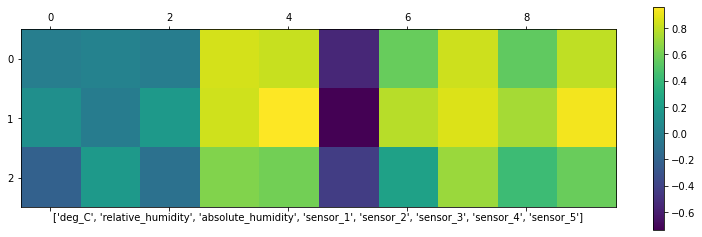

                           deg_C  relative_humidity  absolute_humidity  \
target_carbon_monoxide -0.007503           0.016589          -0.013756   
target_benzene          0.109757          -0.022895           0.186293   
target_nitrogen_oxides -0.205984           0.178608          -0.101911   

                        sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
target_carbon_monoxide  0.857215  0.821025 -0.547567  0.571412  0.834501   
target_benzene          0.842534  0.964440 -0.735545  0.783750  0.877662   
target_nitrogen_oxides  0.643044  0.604795 -0.427622  0.235662  0.708270   

                           new_3   new_sum  
target_carbon_monoxide  0.547567  0.802551  
target_benzene          0.735545  0.937657  
target_nitrogen_oxides  0.427622  0.577332  


In [169]:
show_corr(df)

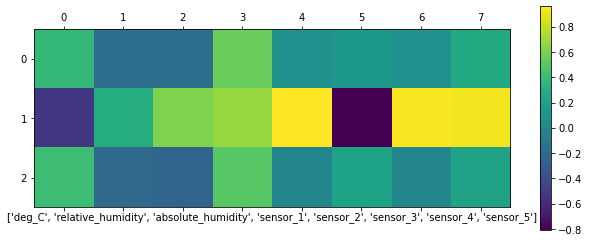

                           deg_C  relative_humidity  absolute_humidity  \
target_carbon_monoxide  0.368205          -0.171852          -0.168940   
target_benzene         -0.523301           0.288393           0.618259   
target_nitrogen_oxides  0.413761          -0.192946          -0.235041   

                        sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  
target_carbon_monoxide  0.555705  0.081689  0.137413  0.084249  0.268217  
target_benzene          0.681581  0.960420 -0.807050  0.941309  0.930449  
target_nitrogen_oxides  0.504289  0.006342  0.215324  0.004832  0.208031  


In [137]:
show_corr(df[6600:6800])

In [80]:
train_x , train_y = df[list(df.columns)[:9]],df[list(df.columns)[9:]]

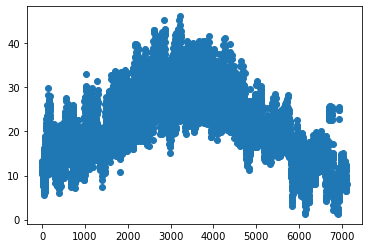

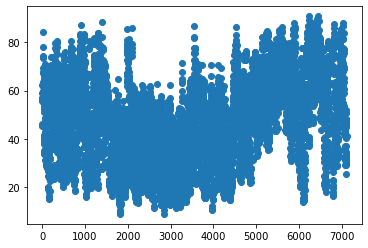

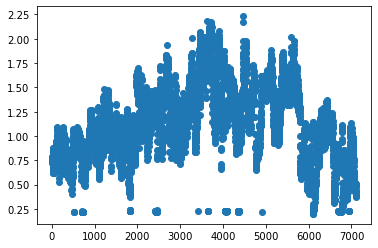

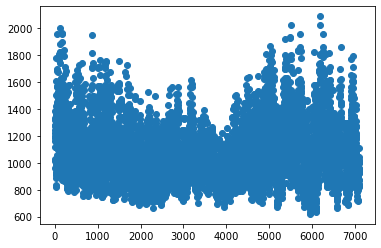

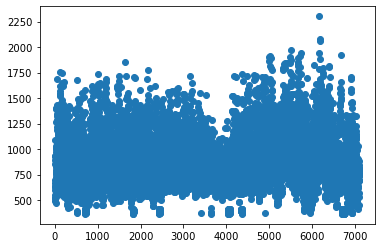

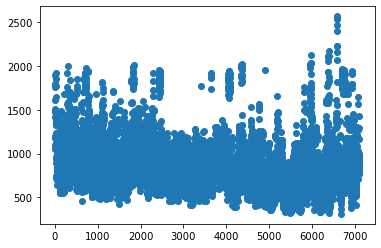

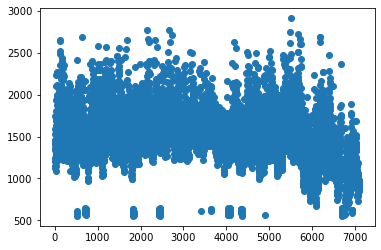

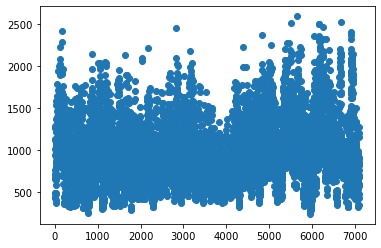

In [48]:
plt.scatter(list(range(len(train_x))),train_x['deg_C'])
plt.show()
plt.scatter(list(range(len(train_x))),train_x['relative_humidity'])
plt.show()
plt.scatter(list(range(len(train_x))),train_x['absolute_humidity'])
plt.show()
plt.scatter(list(range(len(train_x))),train_x['sensor_1'])
plt.show()
plt.scatter(list(range(len(train_x))),train_x['sensor_2'])
plt.show()
plt.scatter(list(range(len(train_x))),train_x['sensor_3'])
plt.show()
plt.scatter(list(range(len(train_x))),train_x['sensor_4'])
plt.show()
plt.scatter(list(range(len(train_x))),train_x['sensor_5'])
plt.show()

In [109]:
round(train_x.describe(),2)

deg_C  relative_humidity  absolute_humidity  sensor_1  sensor_2  \
count  7111.00            7111.00            7111.00   7111.00   7111.00   
mean     20.88              47.56               1.11   1091.57    938.06   
std       7.94              17.40               0.40    218.54    281.98   
min       1.30               8.90               0.20    620.30    364.00   
25%      14.90              33.70               0.86    930.25    734.90   
50%      20.70              47.30               1.08   1060.50    914.20   
75%      25.80              60.80               1.40   1215.80   1124.10   
max      46.10              90.80               2.23   2088.30   2302.60   

       sensor_3  sensor_4  sensor_5  
count   7111.00   7111.00   7111.00  
mean     883.90   1513.24    998.34  
std      310.46    350.18    381.54  
min      310.60    552.90    242.70  
25%      681.05   1320.35    722.85  
50%      827.80   1513.10    928.70  
75%     1008.85   1720.40   1224.70  
max     2567.40   2913.80   2594.60

<AxesSubplot:>

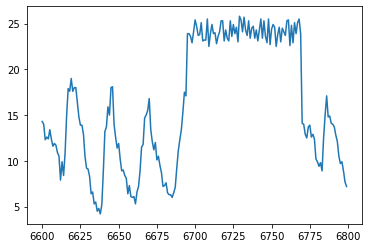

In [136]:
train_x['deg_C'][6600:6800].plot()

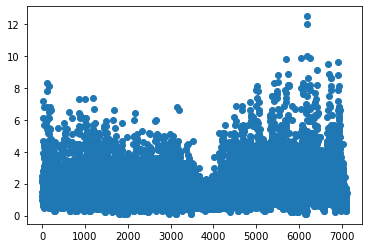

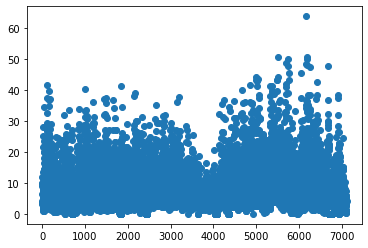

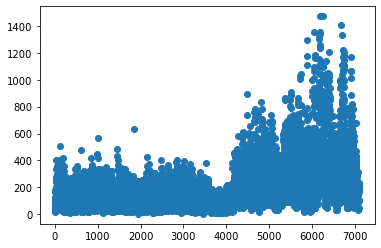

In [59]:
plt.scatter(list(range(len(train_x))),train_y['target_carbon_monoxide'])
plt.show()
plt.scatter(list(range(len(train_x))),train_y['target_benzene'])
plt.show()
plt.scatter(list(range(len(train_x))),train_y['target_nitrogen_oxides'])
plt.show()